In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training_659019.jpg")

In [3]:
img_array.shape

(48, 48, 3)

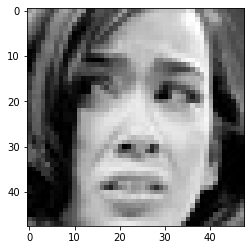

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "data/train"
Classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

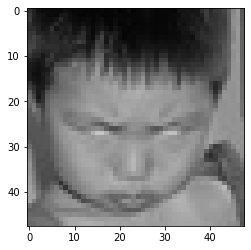

In [6]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

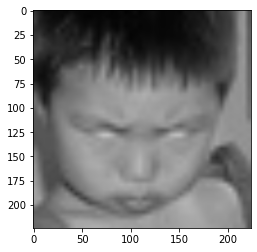

In [7]:
img_size = 224 ## ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(224, 224, 3)

## read all the images & convert them to array

In [9]:
training_data = [] ## data array

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0, 1 label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


In [10]:
create_training_data()

In [11]:
print(len(training_data))

28709


In [12]:
training_data = training_data[0:10000]

In [13]:
import random

random.shuffle(training_data)

In [14]:
X = [] ## data /feature
y = [] ## label

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimensions

In [15]:
X.shape

(10000, 224, 224, 3)

In [16]:
y

[0,
 2,
 0,
 3,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 3,
 0,
 2,
 3,
 2,
 0,
 2,
 1,
 2,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 3,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 3,
 2,
 3,
 0,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 2,
 0,
 3,
 0,
 2,
 1,
 2,
 2,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 3,
 3,
 1,
 0,
 2,
 3,
 2,
 0,
 1,
 2,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 3,
 1,


In [17]:
# normalize the data
X = X/255; ## we're normalizing it

In [18]:
type(y)

list

In [19]:
y = np.array(y)

In [20]:
y.shape

(10000,)

# deep learning model for training - Transfer Learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained model

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

### Transfer Learning - Tuning, weights will start from the last check point

In [24]:
base_input = model.layers[0].input  ## input

In [25]:
base_output = model.layers[-2].output

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output)  ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output) ## my classes are 7

In [28]:
final_output ## output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [31]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [32]:
new_model.fit(X,y, epochs=25, verbose=1)

Epoch 1/25
313/313 [==============================] - 848s 3s/step - loss: 0.8851 - accuracy: 0.6183
Epoch 2/25
313/313 [==============================] - 829s 3s/step - loss: 0.7207 - accuracy: 0.6998
Epoch 3/25
313/313 [==============================] - 817s 3s/step - loss: 0.6504 - accuracy: 0.7327
Epoch 4/25
313/313 [==============================] - 837s 3s/step - loss: 0.5764 - accuracy: 0.7633
Epoch 5/25
313/313 [==============================] - 832s 3s/step - loss: 0.5262 - accuracy: 0.7851
Epoch 6/25
313/313 [==============================] - 847s 3s/step - loss: 0.4780 - accuracy: 0.8072
Epoch 7/25
313/313 [==============================] - 792s 3s/step - loss: 0.4221 - accuracy: 0.8308
Epoch 8/25
313/313 [==============================] - 793s 3s/step - loss: 0.3862 - accuracy: 0.8469
Epoch 9/25
313/313 [==============================] - 805s 3s/step - loss: 0.3392 - accuracy: 0.8657
Epoch 10/25
313/313 [==============================] - 841s 3s/step - loss: 0.3105 - accura

In [33]:
new_model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


## Let's do Predictions with our new trained model

In [110]:
frame = cv2.imread('happyboy.jpg')

In [111]:
frame.shape

(607, 910, 3)

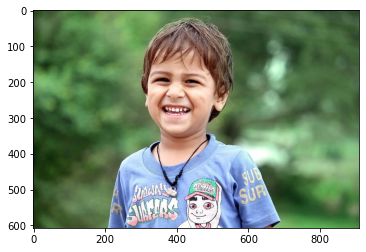

In [112]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#### we need face detection algorithm (gray image)

In [113]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [114]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [115]:
gray.shape

(607, 910)

In [121]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 8) # BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('face not detected')
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

face not detected


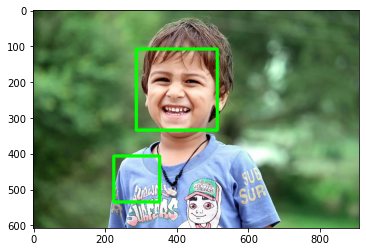

In [122]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

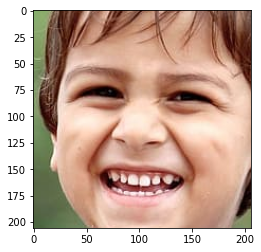

In [124]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [125]:
final_image = cv2.resize(face_roi, (224, 224)) ##
final_image = np.expand_dims(final_image, axis=0) ## need fourth dimension
final_image = final_image/255.0 ## normalizing

In [126]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 42ms/step


In [127]:
Predictions[0]

array([2.1582343e-06, 3.2714740e-07, 1.4031682e-05, 9.9998343e-01,
       3.0323181e-16, 4.3663357e-17, 2.8255015e-18], dtype=float32)

In [128]:
np.argmax(Predictions)

3

# Realtime Video Prediction

In [134]:
import cv2

path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# Make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width & height of the textbox
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)
# check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 8) # BGR
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print('face not detected')
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew] ## cropping the face
            
    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)  ## need fourth dimension
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_PLAIN
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(Predictions)==0):
        status = 'Angry'
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==1):
        status = 'Disgust'
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==2):
        status = 'Fear'
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==3):
        status = 'Happy'
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==4):
        status = 'Sad'
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    else:
        status = 'Neutral'
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status, (100,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 28ms/step
face not detected
1/1 [==============================] - 0s 34ms/step
face not detected
1/1 [==============================] - 0s 33ms/step
face not detected
1/1 [==============================] - 0s 31ms/step
face not detected
1/1 [==============================] - 0s 38ms/step
face not detected
1/1 [==============================] - 0s 24ms/step
face not detected
1/1 [==============================] - 0s 31ms/step
face not detected
1/1 [==============================] - 0s 32ms/step
face not detected
1/1 [==============================] - 0s 22ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 31ms/step
face not detected
1/1 [==============================] - 0s 27ms/step
face not detected
1/1 [==============================] - 0s 25ms/step
face not detected
1/1 [==============================] - 0s 23ms/step
face not detected
1/1 [===============

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 18ms/step
face not detected
1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 47ms/step
face not detected
1/1 [==============================] - 0s 29ms/step
